<a href="https://colab.research.google.com/github/patty-13/MSML-603-UMD-MACHINE-LEARNING/blob/main/HW6_PRATYUSH_SETHI_119344675.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 6 (40 Points)
This homework is about linear and nonlinear regression. From the lecture we remeber that, if

$$
y_i = {\bf w}^T {\bf x}_i  + b + {\epsilon}_i ~~~~ {\text for} ~~ i=1, \cdots, N
$$
where, $b$ is the bias,  and  $\epsilon_i \sim N(0, \sigma^2)$. We also saw that with a change of variavle 
$$
{\bf x}  \leftarrow  \begin{bmatrix} 
                     {\bf x} \\
                     1
                     \end{bmatrix}
$$
$$
{\bf w}  \leftarrow  \begin{bmatrix} 
                     {\bf w} \\
                     b
                     \end{bmatrix}
$$
we can simplify the above equation to 
$$
y_i = {\bf w}^T {\bf x}_i  + {\epsilon}_i ~~~~ {\text for} ~~ i=1, \cdots, N
$$
For the training set $D = \{ ( {\bf x}_1, y_1), ( {\bf x}_2, y_2), \cdots,  ( {\bf x}_N, y_N) \}$ we showed that the  likelihood function can be written as
$$
l({\bf w}) = 1/N \sum_{i=1}^N ({\bf w}^T{\bf x}_i - y_i)^2
$$
and the maximum likelihood estimate of ${\bf w}$ given set $D$ can be written as
$$
\hat{\bf w}_{ML} = \underset{\bf w}{argmin} ~ l({\bf w})
$$
therefore to find $\hat{\bf w}_{ML}$, we need to take the derivative of the above equation 

$$
\begin{align}
\nabla l({\bf w}) &= \nabla l(\left.w_{1}, w_{2}, \ldots, w_{d+1}\right) \\
\\
&=\left[\begin{array}{c}
\dfrac{\partial l}{\partial w_1}(\left.w_{1}, w_{2}, \ldots, w_{d+1}\right)\\
\dfrac{\partial l}{\partial w_2}(\left.w_{1}, w_{2}, \ldots, w_{d+1}\right) \\
\vdots \\
\dfrac{\partial l}{\partial w_{d+1}}(\left.w_{1}, x_{2}, \ldots, w_{d+1}\right) 
\end{array}\right] \\ \\
 & = 1/N \sum_{i=1}^N {\bf x}_i ({\bf x}_i^T {\bf w}- y_i)\\
\end{align} 
$$
where $\nabla l({\bf w})$ is the gradient of likelihood function $l({\bf w})$. In future we use the gradient in a gradient descent algorithm to find the minimum of the function. Here we set $\nabla l({\bf w}) = 0$ and solve for ${\bf w}$. As we saw in the class the solution can be written as follows

$$
\hat{\bf w}_{ML} = ({\bf X} {\bf X}^T)^{-1}{\bf X}{\bf y}
$$

where 
$$
{\bf X} = [{\bf x}_1, {\bf x}_2, \cdots, {\bf x}_N]
$$
and
$$
{\bf y} = [y_1, y_2, \cdots, y_N] 
$$


## We generate a data set with linear dependency here

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(123)
N = 100
b = 3.2
a = 2.5
x = np.random.normal(0, 10, N)
y = a*x + b + np.random.normal(0, 5, N)

**without looking at the data we set aside 20% of the data as test data. The rest is used as training**

Text(0.5, 1.0, 'training data ')

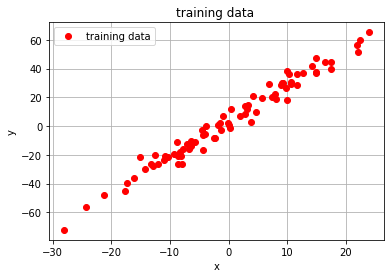

In [ ]:
N_tr = int(N*0.8)
N_tst = N-N_tr
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_tst= x[N_tr:]
y_tst = y[N_tr:]
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data ')

**Change of variable**

$$
{\bf x}  \leftarrow  \begin{bmatrix} 
                     {\bf x} \\
                     1
                     \end{bmatrix}
$$

In [ ]:
X = np.vstack((x_tr , np.ones(N_tr)))
print(X.shape)

(2, 80)


Now we estimate the ${\bf w}$
$$
\hat{\bf w}_{ML} = ({\bf X} {\bf X}^T)^{-1}{\bf X}{\bf y}
$$

In [ ]:
w_ml = np.matmul(np.linalg.inv(np.matmul(X, np.transpose(X))) , np.matmul(X,y_tr))
print(w_ml)

[2.47933439 3.44115681]


**Let us plot the line we found, training data and test data**

Text(0.5, 1.0, 'training data and maximum likelihood estimate of the curve descring the data')

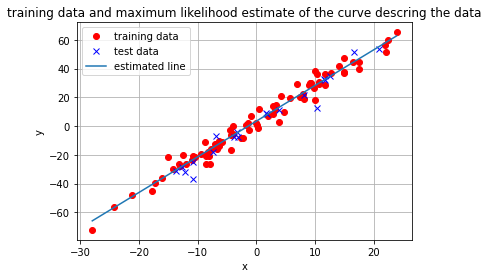

In [ ]:
x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)
yy = w_ml[0]* xx + w_ml[1]
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data and maximum likelihood estimate of the curve descring the data')

**Now let us calculate the Error of the estimate for the training set and test set**

The error can be written as
$$
{\bf E} = 1/N \sum_{i=1}^N ({\hat{\bf w}}_{ML}^T{\bf x}_i - y_i)^2
$$


In [ ]:
X_tr = np.vstack((x_tr, np.ones(len(x_tr))))
X_tst = np.vstack((x_tst, np.ones(len(x_tst))))
training_error = np.mean(np.square(np.matmul(w_ml, X_tr) - y_tr))
test_error = np.mean(np.square(np.matmul(w_ml, X_tst) - y_tst))
print('Error_training = ', training_error)
print('Error_Test = ', test_error)

Error_training =  21.990790589492953
Error_Test =  30.271124823144515


# Problem 1 (30 points)
The goal of problem 1 is to extend the linear regression and find polynomial fit for the given data. In the following we first describe the problem and then show an anlytical solution. Then we generate the training dat and the we state the problem.

## Now we want to apply the linear estimation for nonlinear cases
Assume that  the best fit for
the training set $D = \{ ( { x}_1, y_1), ( { x}_2, y_2), \cdots,  ( { x}_N, y_N) \}$ is the polynomial

$$
y_ i = a_0 + a_1 x_i + a_2 x_i^2 + \cdots + a_p x_i^p
$$

we can define
$$
{\bf x}  =           \begin{bmatrix} 
                     {1} \\
                     x \\
                     x^2 \\
                     \vdots \\
                     x^p \\
                     \end{bmatrix}
$$
Therefore, for every value of $x_i$ in our training data set we can generate a vector 

$$
{\bf x}_i  =           \begin{bmatrix} 
                     {1} \\
                     x_i \\
                     x_i^2 \\
                     \vdots \\
                     x_i^p \\
                     \end{bmatrix}
$$

We can still use 

$$
{\bf X} = [{\bf x}_1, {\bf x}_2, \cdots, {\bf x}_N]
$$

and

$$
{\bf y} = [y_1, y_2, \cdots, y_N] 
$$

Then your solution should be exactly to the one we expressed above, i.e. we get

$$
\hat{\bf w} = ({\bf X} {\bf X}^T)^{-1}{\bf X}{\bf y}
$$

**Let us generate the training data**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(123)
N = 100
b = 3.2
a3 = -0.2
a2 = 0.2
a1 = -1

x = np.random.normal(0, 3, N)
y = a3 * np.power(x,3) + a2* np.power(x,2) + a1*x + b + np.random.normal(0, 10, N)

**Here we introduce a more compact way of generating the same data**
You are more than welcome to use any of these two codes for the solution to the HW.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(123)
N = 100
b = 3.2
a3 = -0.2
a2 = 0.2
a1 = -1
x = np.random.normal(0, 3, N)
p = 3
X = np.ones(N)
for i in np.arange(p):
  X = np.vstack((X, np.power(x , i+1)))
w = np.array([b, a1, a2, a3])
y = np.matmul(w,X) + np.random.normal(0, 10, N)

**We set aside 20% of the data for test**


Text(0.5, 1.0, 'training data ')

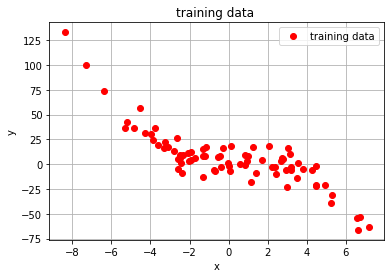

In [ ]:
N_tr = int(N*0.8)
N_tst = N-N_tr
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_tst= x[N_tr:]
y_tst = y[N_tr:]
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data ')


## Problem 1.1 (20 points)
Use polynomial dregree 2, 3, 4, and 10 to find the best fit for the generated data. Follow the proedure showed for the linear case to calculate the error for each case for training dat and for test data. 

WEIGHTS FOR 2ND DEGREE ARE:
[ 1.83781215 -6.91062397  0.35446596]
 
[ 8.48437216e+01  8.46432989e+01  8.44430485e+01  8.42429703e+01
  8.40430644e+01  8.38433308e+01  8.36437695e+01  8.34443805e+01
  8.32451637e+01  8.30461191e+01  8.28472469e+01  8.26485469e+01
  8.24500192e+01  8.22516638e+01  8.20534806e+01  8.18554697e+01
  8.16576311e+01  8.14599647e+01  8.12624706e+01  8.10651488e+01
  8.08679993e+01  8.06710220e+01  8.04742170e+01  8.02775842e+01
  8.00811238e+01  7.98848356e+01  7.96887197e+01  7.94927760e+01
  7.92970046e+01  7.91014055e+01  7.89059787e+01  7.87107241e+01
  7.85156418e+01  7.83207318e+01  7.81259940e+01  7.79314285e+01
  7.77370353e+01  7.75428143e+01  7.73487657e+01  7.71548892e+01
  7.69611851e+01  7.67676532e+01  7.65742936e+01  7.63811063e+01
  7.61880913e+01  7.59952485e+01  7.58025779e+01  7.56100797e+01
  7.54177537e+01  7.52256000e+01  7.50336186e+01  7.48418094e+01
  7.46501725e+01  7.44587079e+01  7.42674155e+01  7.40762955e+01
  7.38853476e+01  7.36

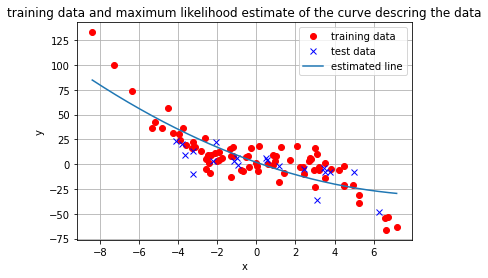

In [ ]:
# SOLUTION FOR 2ND DEGREE POLYNOMIAL

# generating the values 
x_poly_2 = np.array([np.power(x_tr,p) for p in range(3)])
# calculating the weights
w_m1 = np.matmul(np.linalg.inv(np.matmul(x_poly_2, np.transpose(x_poly_2))) , np.matmul(x_poly_2, y_tr))

print("WEIGHTS FOR 2ND DEGREE ARE:")
print(w_m1)
print(" ")


x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)

# 2ND DEGREE POLYNOMIAL DEGREE CALCULATION
yy = w_m1[2]* xx**2 + w_m1[1]*xx + w_m1[0]


plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data and maximum likelihood estimate of the curve descring the data')

# calculating error for second degree polynomial
'''
stacking np.ones in x_tr to make the dimension match the dimension of w_m1
'''
# X_tr = np.vstack(( np.ones(len(x_tr)), np.ones(len(x_tr)),x_tr))
# X_tst = np.vstack((np.ones(len(x_tst)), np.ones(len(x_tst)),x_tst))

X_tr = x_poly_2
X_tst = np.array([np.power(x_tst,p) for p in range(3)])

training_error = np.mean(np.square(np.matmul(w_m1, X_tr) - y_tr))
test_error = np.mean(np.square(np.matmul(w_m1, X_tst) - y_tst))

print('Error_training = ', training_error)
print('Error_Test = ', test_error)
print(" ")
print("GRAPH FOR 2ND DEGREE POLYNOMIAL")

THE WEIGHTS FOR 3RD DEGREE ARE:
[ 4.1650867  -1.18585499  0.15925893 -0.19822556]

Error_training =  87.58695633561258
Error_Test =  122.1837094942197
 
GRAPH FOR 3RD DEGREE POLYNOMIAL


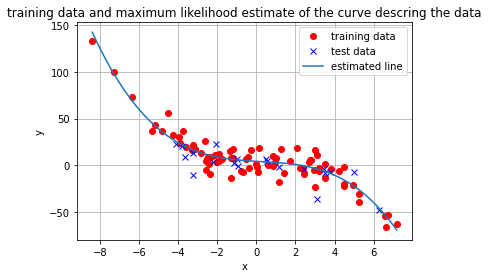

In [ ]:
# SOLUTION FOR DEGREE 3 POLYNOMIAL

# generating the values
x_poly_3 = np.array([np.power(x_tr,p) for p in range(4)])
# calculating the weights
w_m2 = np.matmul(np.linalg.inv(np.matmul(x_poly_3, np.transpose(x_poly_3))) , np.matmul(x_poly_3,y_tr))

print("THE WEIGHTS FOR 3RD DEGREE ARE:")
print(w_m2)
print("")

x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)

# DEGREE 3 POLYNOMIAL CALCULATION
yy = w_m2[3]* (xx**3) + w_m2[2]*(xx**2) + w_m2[1]*(xx) + w_m2[0]

plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data and maximum likelihood estimate of the curve descring the data')

# calculating error for Third degree polynomial
'''
stacking np.ones in x_tr to make the dimension match the dimension of w_m1
'''

# X_tr = np.vstack((np.ones(len(x_tr)), np.ones(len(x_tr)), np.ones(len(x_tr)), x_tr))
# X_tst = np.vstack((np.ones(len(x_tst)), np.ones(len(x_tst)), np.ones(len(x_tst)), x_tst))

X_tr = x_poly_3
X_tst = np.array([np.power(x_tst,p) for p in range(4)])

training_error = np.mean(np.square(np.matmul(w_m2, X_tr) - y_tr))
test_error = np.mean(np.square(np.matmul(w_m2, X_tst) - y_tst))

print('Error_training = ', training_error)
print('Error_Test = ', test_error)
print(" ")
print("GRAPH FOR 3RD DEGREE POLYNOMIAL")

WEIGHTS FOR 4TH DEGREE ARE:
[ 2.56035359 -1.00470033  0.48304873 -0.20862897 -0.00652276]
 
Error_training =  84.80020948702764
Error_Test =  128.56855395240157
 
GRAPH FOR 4TH DEGREE


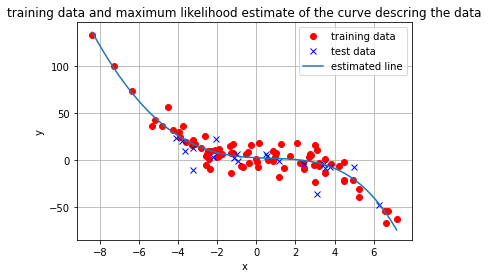

In [ ]:
# SOLUTION FOR DEGREE 4

# generating the values
x_poly_4 = np.array([np.power(x_tr,p) for p in range(5)])
# calculating the weights
w_m3 = np.matmul(np.linalg.inv(np.matmul(x_poly_4, np.transpose(x_poly_4))) , np.matmul(x_poly_4,y_tr))

print("WEIGHTS FOR 4TH DEGREE ARE:")
print(w_m3)
print(" ")

x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)

# Fourth Degree Polynomial calculation
yy = w_m3[4]* (xx**4) + w_m3[3]*(xx**3) + w_m3[2]*(xx**2) + w_m3[1]*(xx) + w_m3[0]

plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data and maximum likelihood estimate of the curve descring the data')

# calculating error for Fourth degree polynomial
'''
stacking np.ones in x_tr to make the dimension match the dimension of w_m3
'''
# X_tr = np.vstack((np.ones(len(x_tr)),np.ones(len(x_tr)),np.ones(len(x_tr)),np.ones(len(x_tr)), x_tr))
# X_tst = np.vstack((np.ones(len(x_tst)),np.ones(len(x_tst)),np.ones(len(x_tst)),np.ones(len(x_tst)), x_tst))

X_tr = x_poly_4
X_tst = np.array([np.power(x_tst,p) for p in range(5)])

training_error = np.mean(np.square(np.matmul(w_m3, X_tr) - y_tr))
test_error = np.mean(np.square(np.matmul(w_m3, X_tst) - y_tst))
print('Error_training = ', training_error)
print('Error_Test = ', test_error)
print(" ")
print("GRAPH FOR 4TH DEGREE")

WEIGHTS FOR 10TH DEGREE ARE:
[ 3.68678802e+00 -3.14932540e-01 -8.72965308e-01 -1.42826334e-01
  2.39050312e-01 -1.47166681e-02 -1.38652084e-02  5.01266129e-04
  2.93248200e-04 -4.67274794e-06 -2.05508365e-06]
 
Error_training =  76.87650158373717
Error_Test =  157.83042117543494
 
GRAPH FOR 10TH DEGREE


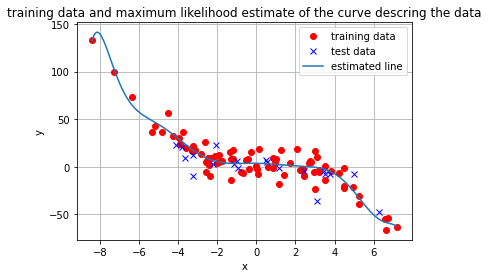

In [ ]:
# SOLUTION FOR 10TH DEGREE

# generating the values
x_poly_10 = np.array([np.power(x_tr,p) for p in range(11)])
# calculating the weights
w_m4 = np.matmul(np.linalg.inv(np.matmul(x_poly_10, np.transpose(x_poly_10))) , np.matmul(x_poly_10,y_tr))

print("WEIGHTS FOR 10TH DEGREE ARE:")
print(w_m4)
print(" ")

x_min, x_max = np.min(x_tr), np.max(x_tr)
xx = np.linspace(x_min, x_max, 1000)

# 10TH DEGREE CALCULATION 
yy = w_m4[10]* (xx**10) + w_m4[9]*(xx**9) + w_m4[8]*(xx**8) + w_m4[7]*(xx**7) + w_m4[6]*(xx**6)\
 + w_m4[5]*(xx**5)+ w_m4[4]*(xx**4)+ w_m4[3]*(xx**3)+ w_m4[2]*(xx**2)+ w_m4[1]*(xx) + w_m4[0] 
 
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.plot(xx,yy, label= 'estimated line')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training data and maximum likelihood estimate of the curve descring the data')

# calculating error for TENTH degree polynomial
'''
stacking np.ones in x_tr to make the dimension match the dimension of w_m4
'''
# X_tr = np.vstack((np.ones(len(x_tr)),np.ones(len(x_tr)),np.ones(len(x_tr)),np.ones(len(x_tr)),np.ones(len(x_tr)),np.ones(len(x_tr)),np.ones(len(x_tr)),np.ones(len(x_tr)),np.ones(len(x_tr)),np.ones(len(x_tr)),x_tr))
# X_tst = np.vstack((np.ones(len(x_tst)),np.ones(len(x_tst)),np.ones(len(x_tst)),np.ones(len(x_tst)),np.ones(len(x_tst)),np.ones(len(x_tst)),np.ones(len(x_tst)),np.ones(len(x_tst)),np.ones(len(x_tst)),np.ones(len(x_tst)),x_tst))

X_tr = x_poly_10
X_tst = np.array([np.power(x_tst,p) for p in range(11)])

training_error = np.mean(np.square(np.matmul(w_m4, X_tr) - y_tr))
test_error = np.mean(np.square(np.matmul(w_m4, X_tst) - y_tst))
print('Error_training = ', training_error)
print('Error_Test = ', test_error)
print(" ")
print("GRAPH FOR 10TH DEGREE")


## Problem 1.2 (10 points)
Please compare the three results and explain which degree you can use.

AxesSubplot(0.125,0.125;0.775x0.755)


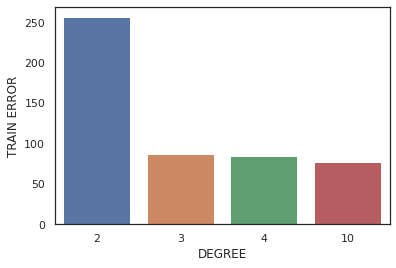

In [ ]:
'''
OVERFITTING

When we have low training error and high test error. In this case, why having low
training error is bad, because basically the data starts fit all the points dynamically
even the noise, hence having high variance, which can been seen in 10th degree polynomial
with train error = 76.87 and high test error = 157.83 showing that the weights calculated
were highly fitted to the ones on train data and could perform well when tested with 
test data.

In case of 3rd and 4th, 4th had better training data than 3rd, but when come to compare about
the test error = 3rd performed well than 4th and rest of the degree including 2nd, 4th and 10th.

[here ">" indicates "better" not "more than"]

4th train error > 3rd train error 
84.8 > 87.58 [leading to slightly overfit than the 3rd degree case]

3rd test error >  4th test error
122.18 > 128.56 


UNDERFITTING:

When we have High training error and high test error, then we can say that the 
weights didn't fit the model well, or the data was underfitted as seen in the
case of 2nd Degree polynomial where the  train error = 256.21, and test error = 231.94.
An underfit model has low variance and high bias which means it makes strong assumption
about the data.

CONCLUSION
1. 3RD DEGREE POLYNOMIAL BEST FIT THE DATA. (OVERFITTING BUT PERFORMS BETTER THAN THE REST)
2. 4TH DEGREE POLYNOMIAL (SLIGHT LESS OVERFITTING THAN 3RD)
3. 10TH DEGREE POLYNOMIAL (OVERFITTING)
4. 2ND DEGREE POLYNOMIAL (UNDERFITTING)
'''

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({ 'TRAIN ERROR': [256.21,87.58,84.80,76.87],'TEST ERROR':[231.94,122.183,128.56,157.83],'DEGREE':['2','3','4','10']})
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
print(sns.barplot(x='DEGREE', y='TRAIN ERROR',data=df))



AxesSubplot(0.125,0.125;0.775x0.755)


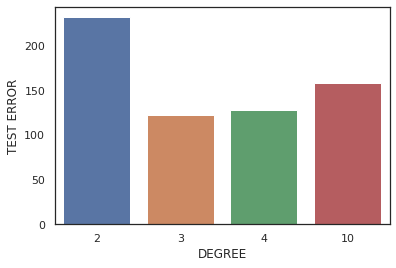

In [ ]:
print(sns.barplot(x='DEGREE', y='TEST ERROR',data=df))

# Problem 2 (10 points)

Please watch the lecture by Prof. Mercado, https://www.youtube.com/watch?v=_q2p6-4e3E8.

You will be responsible for the material covered in this lecture.
You should state that you watched the entire lecture to receive 10 points.

In [ ]:
# I have watched the entire lecture